In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pwd

'C:\\Users\\elitebook 840'

In [3]:
df = pd.read_csv(r'C:\\Users\\elitebook 840\\Desktop\\energydata_complete.csv')

In [4]:
columns_names = {'T1':'Kitchen_temperature', 'RH_1':'kitchen_humidity',
                'T2':'livingroom_temperature', 'RH_2':'livingroom_humidity',
                'T3':'laundryroom_temperature', 'RH_3':'laundryroom_humidity',
                'T4': 'officeroom_temperature', 'RH_4': 'officeroom_humidity', 
                'T5': 'bathroom_temperature', 'RH_5': 'bathroom_humidity', 
                'T6': 'outsidebuilding_temperature', 'RH_6':'outsidebuilding _humidity',
                'T7': 'ironingroom_temperature', 'RH_7': 'ironingroom_humidity',
                'T8': 'teenagerroom2_temperature', 'RH_8': 'teenagerroom2_humidity', 
                'T9': 'parentsroom_temperature', 'RH_9': 'parentsroom_humidity', 
                'T0': 'outside_temperature', 
                'Press_mm_hg':'Pressure_Chievers',  'RH_out': 'outside_humidity_Chievers', 
                 'Windspeed':'Wind_speed_Chievers', 
                 'Visibility':'Visibility_Chievers', 
                 'Tdewpoint':'Tdewpoint_Chievers',
                'rv1': 'Random variable 1', 'rv2':'Random variable2'}

In [5]:
df = df.rename(columns=columns_names)

In [6]:
df.describe(include='all')

,date,Appliances,lights,Kitchen_temperature,kitchen_humidity,livingroom_temperature,livingroom_humidity,laundryroom_temperature,laundryroom_humidity,officeroom_temperature,...,parentsroom_temperature,parentsroom_humidity,T_out,Pressure_Chievers,outside_humidity_Chievers,Wind_speed_Chievers,Visibility_Chievers,Tdewpoint_Chievers,Random variable 1,Random variable2
count,19735,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
unique,19735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2016-03-12 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,NaN,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,NaN,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,NaN,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,NaN,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,NaN,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769


In [7]:
#INSRUCTIONS

In [8]:
df.drop(['date'],axis=1,inplace=True)

In [9]:
df.drop(['lights'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
normalised_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
features_df = normalised_df.drop(columns=['Random variable 1', 'Random variable2'])
heating_target = normalised_df['Random variable 1']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=42)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
reg = LinearRegression()

In [15]:
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
predicted_values = linear_model.predict(x_test)

In [17]:
reg = LinearRegression()
reg.fit(df[['Appliances', 'Kitchen_temperature']], df[['Random variable 1']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
reg.coef_

array([[-0.00153193, -0.05056719]])

In [19]:
reg.intercept_

array([26.23432399])

In [20]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score,2)

-0.0

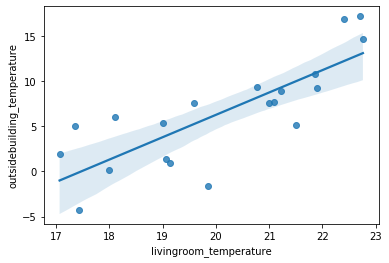

In [21]:
simple_linear_reg_df = df[['livingroom_temperature', 'outsidebuilding_temperature']].sample(20,random_state=2)
sns.regplot(x="livingroom_temperature", y="outsidebuilding_temperature" ,data=simple_linear_reg_df)

In [22]:
Q.12

SyntaxError: invalid syntax (<ipython-input-22-772353bf519e>, line 1)

In [23]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, predicted_values)
round(r2_score,2)

-0.0

In [24]:
Q.13

SyntaxError: invalid syntax (<ipython-input-24-d9d3a5f828f3>, line 1)

In [25]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae,2)

0.25

In [26]:
Q.14

SyntaxError: invalid syntax (<ipython-input-26-83cb73607948>, line 1)

In [27]:
import numpy as np
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 2)

497.19

In [28]:
Q.15

SyntaxError: invalid syntax (<ipython-input-28-9256748cd3ae>, line 1)

In [29]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.29

# Q.16
#the coefficient of Determination is the same with R-squared method, which is -0.0

In [30]:
def get_weights_df(model, feat, col_name):   
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Tdewpoint_Chievers,-0.077631,-0.059678,0.000000
1,parentsroom_humidity,-0.050589,-0.049626,0.000000
2,bathroom_temperature,-0.043675,-0.041542,-0.000000
3,laundryroom_temperature,-0.041190,-0.040893,-0.000000
4,outsidebuilding_temperature,-0.040702,-0.034333,-0.000000
5,laundryroom_humidity,-0.040586,-0.039134,0.000000
6,bathroom_humidity,-0.040395,-0.040454,-0.000000
7,Kitchen_temperature,-0.039450,-0.035026,-0.000000
8,kitchen_humidity,-0.038484,-0.032336,0.000000
9,teenagerroom2_temperature,-0.034503,-0.034323,-0.000000


# Q. 17

In [34]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')

print(linear_model_weights.nsmallest(3,'Linear_Model_Weight' )['Linear_Model_Weight'])
# the lowest and highest weights for linear model above is T6(outsidebuilding_teperature) and RH_4(officeroom_humidity)

0   -0.077631
1   -0.050589
2   -0.043675
Name: Linear_Model_Weight, dtype: float64


# Q. 18

In [35]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [36]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.29

# Q. 19

In [37]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [38]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')

final_weights = pd.merge(linear_model_weights, ridge_weights_df, on='Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on='Features')
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,Tdewpoint_Chievers,-0.077631,-0.062550,0.000000
1,parentsroom_humidity,-0.050589,-0.049805,0.000000
2,bathroom_temperature,-0.043675,-0.041916,-0.000000
3,laundryroom_temperature,-0.041190,-0.040956,-0.000000
4,outsidebuilding_temperature,-0.040702,-0.035387,-0.000000
5,laundryroom_humidity,-0.040586,-0.039397,0.000000
6,bathroom_humidity,-0.040395,-0.040448,-0.000000
7,Kitchen_temperature,-0.039450,-0.035795,-0.000000
8,kitchen_humidity,-0.038484,-0.033447,0.000000
9,teenagerroom2_temperature,-0.034503,-0.034366,-0.000000


# Q. 20

In [39]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.29